In [194]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [195]:
num_classes=26  #although only 34 classes are used 62 have been put so as to make minimal changes in the class mapping 
img_size=28
data_path=r"C:\Users\hp pavelion\Downloads\Final_dataset_csv\file1.csv"
def img_label(data_path, num_classes=26):
    data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    
    imgs = np.array(data.values[:,1:].reshape(data_rows, img_size, img_size, 1))  #values in csv were such that the image needs to be transposed before training
    
    labels = to_categorical(data.values[:,0], num_classes)
    
    return imgs/255, labels

In [196]:
imgs,labels=img_label(data_path)

In [197]:
imgs[0].shape

(28, 28, 1)

In [198]:
labels.shape

(57558, 26)

In [199]:
import tensorflow as tf
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 48)        20784     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          13856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 32)        

In [62]:
import tensorflow as tf
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,2,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               2769408   
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 26)                3354      
                                                      

In [63]:
# data_generator_aug=ImageDataGenerator(rotation_range=20,validation_split=0.3) #Commented

In [64]:
# data_generator=ImageDataGenerator(validation_split=0.1) #Commented

In [200]:
X,Y=img_label(r"C:\Users\hp pavelion\Downloads\Final_dataset_csv\file1.csv",26)

In [201]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
checkpoint = ModelCheckpoint(r'C:\Users\hp pavelion\Downloads\Final_dataset_csv\modified_weights-{epoch:03d}.h5',
                                 monitor='val_acc',
                                 verbose=0,
                                 save_best_only=False,
                                 mode='auto')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)


In [241]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.5,random_state = 42)

In [242]:
# training_data_generator = data_generator_aug.flow(X, Y,batch_size=2000, subset='training') #Commented
# validation_data_generator = data_generator.flow(X, Y,batch_size=2000,subset='validation') #Commented
# history = model.fit(training_data_generator, epochs=40, validation_data=validation_data_generator,validation_steps=1,callbacks=[checkpoint])
history = model.fit(train_x,train_y,epochs=3,validation_data=(test_x,test_y),callbacks=[checkpoint,ES,RLP])

Epoch 1/3
900/900 [==============================] - 19s 21ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 0.1111 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 2/3
900/900 [==============================] - 18s 20ms/step - loss: 0.0476 - accuracy: 0.9841 - val_loss: 0.1483 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 3/3
900/900 [==============================] - 17s 19ms/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.1286 - val_accuracy: 0.9713 - lr: 0.0010


In [289]:
model.save(r"C:\Users\hp pavelion\Downloads\Final_dataset_csv\model.h5")

In [274]:
import cv2
import matplotlib.pyplot as plt
test_image=cv2.imread(r"C:\Users\hp pavelion\Downloads\B.jpeg",cv2.IMREAD_GRAYSCALE)
test_image=cv2.resize(test_image,(28,28))
print(test_image.shape)
test_image=cv2.bitwise_not(test_image)
ret3,test_image=cv2.threshold(test_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(28, 28)


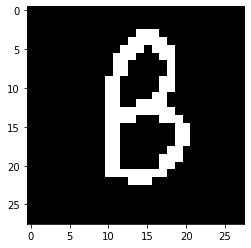

In [275]:
plt.imshow(test_image,cmap='Greys_r')
plt.show()

In [276]:
class_mapping=["A","1-tick","2-cloud","3-croissant","4-heart","5-laugh","6-smile","7-sun","B","E","F","G","H","I","N","O","P","R","S","T","Z","Y","g","h","t","w"]
x=np.reshape(test_image,(28,28,1))/255
y=[x]
y=np.array(y)
result=np.argmax(model.predict(y))
print(result)
print(class_mapping[result])
model.predict(y)

8
B


array([[1.7003923e-06, 5.0556188e-16, 2.3487410e-09, 1.4860321e-10,
        9.3251839e-13, 5.8996260e-08, 1.6576246e-13, 5.7154229e-11,
        9.9695885e-01, 2.8017871e-13, 8.1722016e-12, 3.0341770e-03,
        5.0811349e-07, 1.1979263e-11, 1.6003934e-11, 7.9385609e-11,
        2.1389485e-13, 4.1394671e-07, 7.7447835e-09, 1.5618088e-23,
        6.3151906e-09, 5.8652678e-09, 4.4190333e-06, 1.6920928e-09,
        7.0240207e-14, 3.0375910e-12]], dtype=float32)

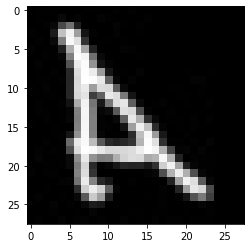

In [247]:
plt.imshow(imgs[0],cmap="gray")

In [281]:
def segmentation(photo):
    blur = cv2.GaussianBlur(photo,(3,3),2)
#     blur=photo
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.imshow(blur,cmap="gray")
    my_segmented_stack=[]
    start=0
    for i in range(0,len(th3[0])):
        flag=0
        count=0
        for j in range(0,len(th3)):
            if(th3[j][i]==0):
                count=count+1
        if(count>6):
            flag=1
        if(flag==1 and start==0):
            xi=i
            start=1
        if(flag==0 and start==1):
            xf=i
    #         print(xi,xf)
            start=0
    #         print(xf,xi)
            if(xf-xi>len(th3[0])/50):
                margin=20
                cropped = th3[0:len(th3[0])-2,max(0,xi-margin):min(len(th3[0]-1),xf+margin)]
                # print(cropped)
                count2=0
                for k in range(0,len(cropped)):
                    for l in range(0,len(cropped[0])):
                        if(cropped[k][l]==0):
                            count2=count2+1
                    if(count2>0):
                        yi=k
                        break
                count2=0
                for k in range(len(cropped)-1,-1,-1):
                    for l in range(0,len(cropped[0])):
                        if(cropped[k][l]==0):
                            count2=count2+1
                    if(count2>0):
                        yf=k
                        break
    #             print(yi,yf)
                
                cropped = th3[max(yi-margin,0):min(yf+margin,len(th3)-1),  max(0,xi-margin):min(len(th3[0]-1),xf+margin)]
#                 cropped = th3[yi-20:yf+20,xi-20:xf+20]
                print(yi,yf,xi,xf)
                kernel = np.ones((5,5), np.uint8)
                cropped = cv2.erode(cropped, kernel, iterations=1)
                cropped=cv2.resize(cropped,(28,28))
                cropped=cv2.bitwise_not(cropped)
#                 cropped = cv2.GaussianBlur(cropped,(3,3),0)
                my_segmented_stack.append(cropped)
    return my_segmented_stack
        
            # start=0
            
    
    

In [282]:
def main(img_path):
    img=cv2.imread(img_path,0)
#     print(img)
    img_stack=segmentation(img)
    t=""
    for i in img_stack:
        plt.imshow(i,cmap="gray")
        plt.show()
        x=np.reshape(i,(28,28,1))/255
        y=[x]
        y=np.array(y)
        result=np.argmax(model.predict(y))
        print(class_mapping[result])
        t+=class_mapping[result]
    print(t)

    

159 248 139 227
155 314 303 377
158 313 446 537
109 234 596 651
123 234 718 799
136 229 851 993


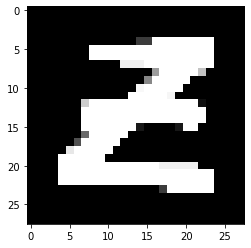

Z


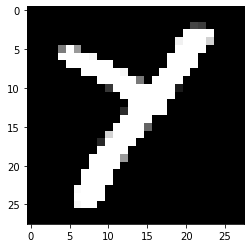

Y


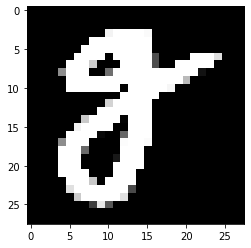

g


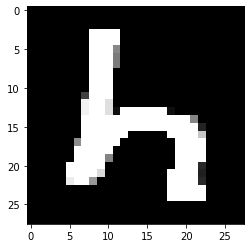

h


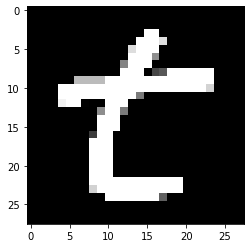

t


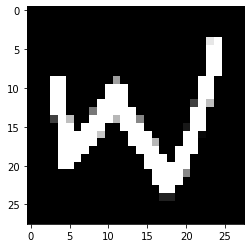

w
ZYghtw


In [288]:
main(r"C:\Users\hp pavelion\Downloads\WhatsApp Image 2022-04-06 at 10.52.45 PM.jpeg")